In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py


In [51]:
eclipse = ['1']
aperture = ['4', '5', '6', '7', '8', '9', '10', '11', '12']
segments = ['0000', '0001', '0002', '0003', '0004']

# Initialize dictionaries to hold arrays for each aperture
time_arr = {a: [] for a in aperture}
aplev_arr = {a: [] for a in aperture}
aperr_arr = {a: [] for a in aperture}
centroid_x_arr = {a: [] for a in aperture}
centroid_y_arr = {a: [] for a in aperture}

for a in aperture:
    for seg in segments:
        if eclipse[0] == '1':
            path = '/Volumes/HardDrive/LHS1140-c/JWST_eclipse'+eclipse[0]+'/LHS1140c-S3_ap' + a + '_bg12_30/S3_lhs1140c_ap' + a + '_bg12_30_FluxData_seg'+seg+'.h5'
        elif eclipse[0] == '2':
            path = '/Volumes/HardDrive/LHS1140-c/JWST_eclipse'+eclipse[0]+'/Stage3/S3_2024-07-22_lhs1140c_run1/ap' + a + '_bg12_30/S3_lhs1140c_ap' + a + '_bg12_30_FluxData_seg'+seg+'.h5'
        elif eclipse[0] == '3':
            path = '/Volumes/HardDrive/LHS1140-c/JWST_eclipse'+eclipse[0]+'/Stage3/S3_2024-08-05_lhs1140c_run1/ap' + a + '_bg12_30/S3_lhs1140c_ap' + a + '_bg12_30_FluxData_seg'+seg+'.h5'
        with h5py.File(path, 'r') as file:     # open the file
            time_arr[a] = np.append(time_arr[a], np.array(file['time']))
            aplev_arr[a] = np.append(aplev_arr[a], np.array(file['aplev']))
            aperr_arr[a] = np.append(aperr_arr[a], np.array(file['aperr']))
            centroid_x_arr[a] = np.append(centroid_x_arr[a], np.array(file['centroid_x']))
            centroid_y_arr[a] = np.append(centroid_y_arr[a], np.array(file['centroid_y']))

    time_arr[a] = np.array(time_arr[a])
    aplev_arr[a] = np.array(aplev_arr[a])
    aperr_arr[a] = np.array(aperr_arr[a])
    centroid_x_arr[a] = np.array(centroid_x_arr[a])
    centroid_y_arr[a] = np.array(centroid_y_arr[a])
    


4.732341330664791


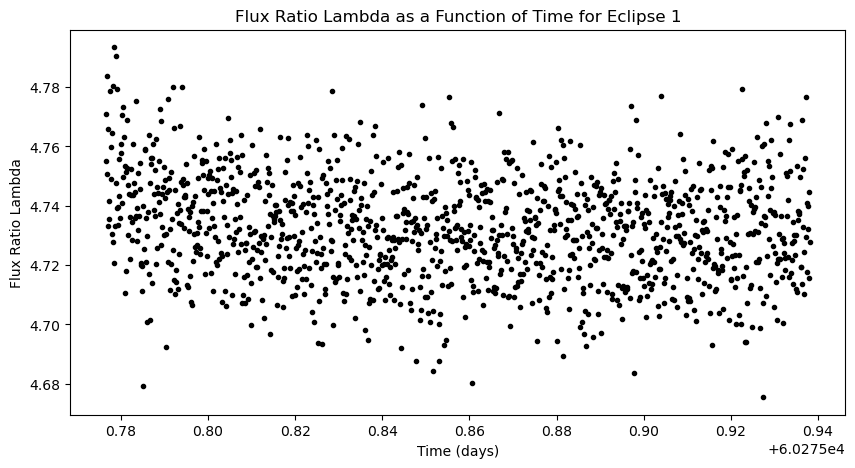

In [52]:
# Eclipse 1
ratio = aplev_arr['5']/(aplev_arr['10'] - aplev_arr['5'])
plt.figure(figsize=(10, 5))
plt.plot(time_arr['5'], ratio, 'k.')
plt.xlabel('Time (days)')
plt.ylabel('Flux Ratio Lambda')
plt.title('Flux Ratio Lambda as a Function of Time for Eclipse 1')

print(np.mean(ratio))


Text(0.5, 1.0, 'Trend in Lambda ratio for Eclipse 1')

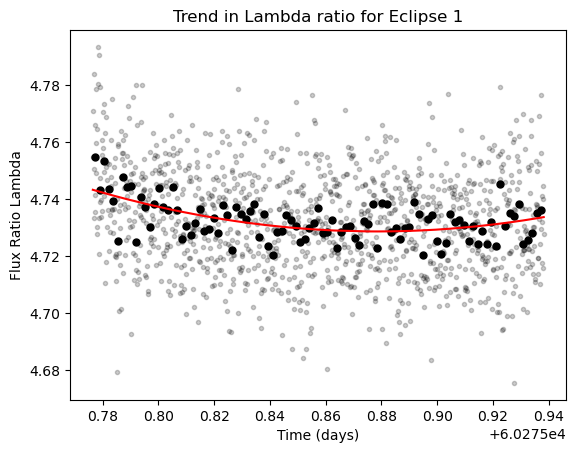

In [53]:
# trend
time = time_arr['5']
nbin = 100
bins_time, binErr_t = binValues(time, time, nbin)
bins_ratio, binErr_aplev = binValues(ratio, time, nbin)

a, b, c = np.polyfit(bins_time, bins_ratio, 2)
plt.plot(time, ratio, 'k.', alpha=0.2)
plt.plot(bins_time, bins_ratio, 'k.', markersize=10)
plt.plot(time_arr['5'], a*time_arr['5']**2 + b*time_arr['5'] + c, 'r-')
plt.xlabel('Time (days)')
plt.ylabel('Flux Ratio Lambda')
plt.title('Trend in Lambda ratio for Eclipse 1')

4.615990447087653


<Figure size 1000x500 with 0 Axes>

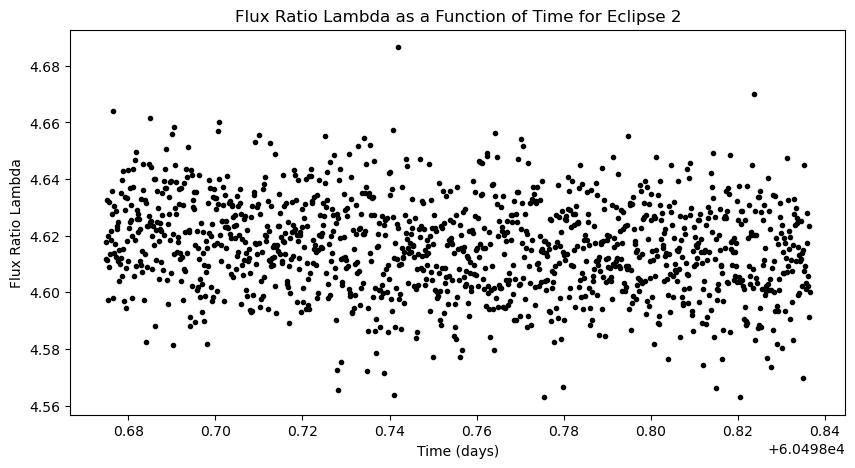

<Figure size 1000x500 with 0 Axes>

In [43]:
# Eclipse 2
ratio = aplev_arr['5']/(aplev_arr['10'] - aplev_arr['5'])
plt.figure(figsize=(10, 5))
plt.plot(time_arr['5'], ratio, 'k.')
plt.xlabel('Time (days)')
plt.ylabel('Flux Ratio Lambda')
plt.title('Flux Ratio Lambda as a Function of Time for Eclipse 2')
print(np.mean(ratio))

plt.figure(figsize=(10, 5))
#plt.errorbar(time_arr['5'], ratio, yerr = aperr_arr['5'])

Text(0.5, 1.0, 'Trend in Lambda ratio for Eclipse 2')

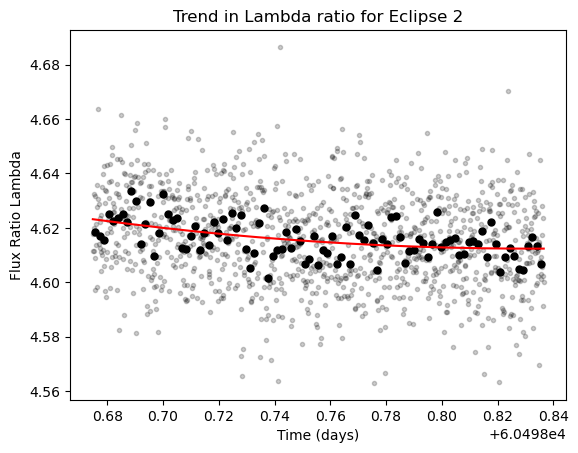

In [47]:
# trend
time = time_arr['5']
nbin = 100
bins_time, binErr_t = binValues(time, time, nbin)
bins_ratio, binErr_aplev = binValues(ratio, time, nbin)

a, b, c = np.polyfit(bins_time, bins_ratio, 2)
plt.plot(time, ratio, 'k.', alpha=0.2)
plt.plot(bins_time, bins_ratio, 'k.', markersize=10)
plt.plot(time_arr['5'], a*time_arr['5']**2 + b*time_arr['5'] + c, 'r-')
plt.xlabel('Time (days)')
plt.ylabel('Flux Ratio Lambda')
plt.title('Trend in Lambda ratio for Eclipse 2')

4.75372006812884


<Figure size 1000x500 with 0 Axes>

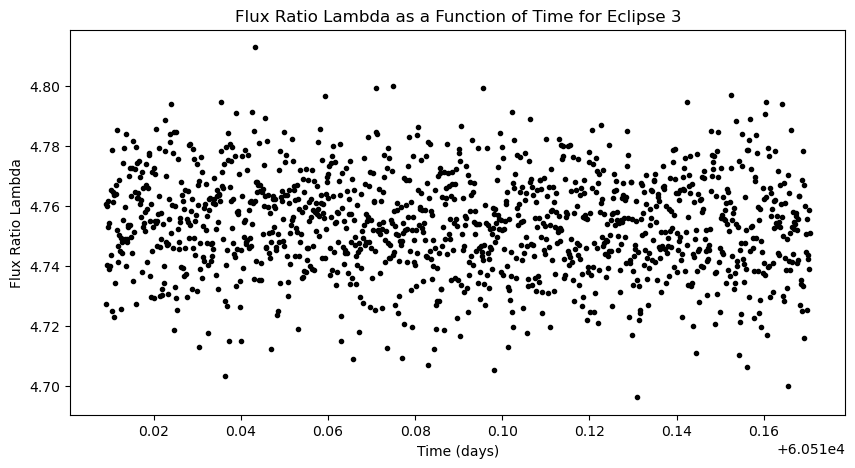

<Figure size 1000x500 with 0 Axes>

In [49]:
# Eclipse 3
ratio = aplev_arr['5']/(aplev_arr['10'] - aplev_arr['5'])
plt.figure(figsize=(10, 5))
plt.plot(time_arr['5'], ratio, 'k.')
plt.xlabel('Time (days)')
plt.ylabel('Flux Ratio Lambda')
plt.title('Flux Ratio Lambda as a Function of Time for Eclipse 3')
print(np.mean(ratio))

plt.figure(figsize=(10, 5))
#plt.errorbar(time_arr['5'], ratio, yerr = aperr_arr['5'])

Text(0.5, 1.0, 'Trend in Lambda ratio for Eclipse 3')

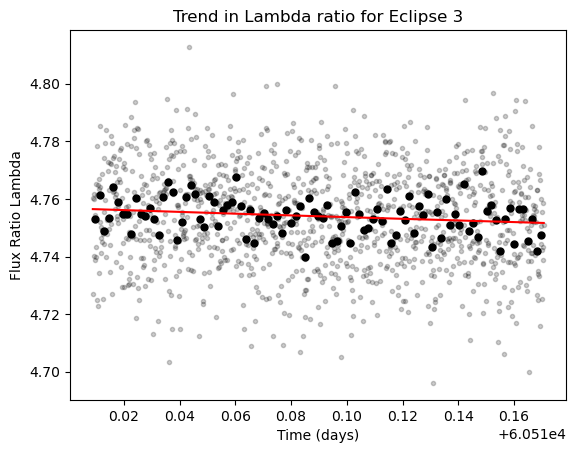

In [50]:
# trend
time = time_arr['5']
nbin = 100
bins_time, binErr_t = binValues(time, time, nbin)
bins_ratio, binErr_aplev = binValues(ratio, time, nbin)

a, b, c = np.polyfit(bins_time, bins_ratio, 2)
plt.plot(time, ratio, 'k.', alpha=0.2)
plt.plot(bins_time, bins_ratio, 'k.', markersize=10)
plt.plot(time_arr['5'], a*time_arr['5']**2 + b*time_arr['5'] + c, 'r-')
plt.xlabel('Time (days)')
plt.ylabel('Flux Ratio Lambda')
plt.title('Trend in Lambda ratio for Eclipse 3')

In [41]:
def binValues(values, binAxisValues, nbin, assumeWhiteNoise=True):
    """Bin values and compute their binned noise.

    Args:
        values (ndarray): An array of values to bin.
        binAxisValues (ndarray): Values of the axis along which binning will occur.
        nbin (int): The number of bins desired.
        assumeWhiteNoise (bool, optional): Divide binned noise by sqrt(nbinned) (True) or not (False, default).

    Returns:
        tuple: binned (ndarray; the binned values),
            binnedErr (ndarray; the binned errors)
    
    """
    
    bins = np.linspace(np.nanmin(binAxisValues), np.nanmax(binAxisValues), nbin)
    digitized = np.digitize(binAxisValues, bins)
    binned = np.array([np.nanmedian(values[digitized == i]) for i in range(1, nbin)])
    binnedErr = np.nanmean(np.array([np.nanstd(values[digitized == i]) for i in range(1, nbin)]))
    if assumeWhiteNoise:
        binnedErr /= np.sqrt(len(values)/nbin)
    return binned, binnedErr